# EDA

import pandas as pd
data = pd.read_csv("train.csv")
data.head()

In [8]:
x = data.drop(labels= ["label"], axis= 1)
y = data["label"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = True)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [19]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [20]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

Text(0.5, 1.0, '7')

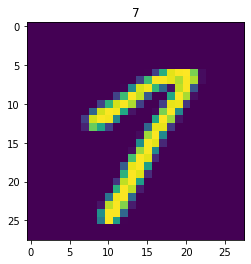

In [29]:
from matplotlib import pyplot as plt
plt.imshow(x_train[34])
plt.title(y_train[34])

# Hyperparameter Function 

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

In [48]:
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(
        filters = hp.Int("conv_1_filter", min_value = 32, max_value = 128, step = 16), 
        kernel_size = hp.Choice("conv_1_kernel", values = [2,3,4]),
        activation = "relu", 
        input_shape = (28,28,1)
    ))
    
    model.add(Flatten())
    
    model.add(Dense(
        units = hp.Int("dense_1_units", min_value = 10, max_value = 100, step = 20),
        activation = "sigmoid"
    ))
    
    model.add(Dense(
        units = 10,
        activation = "sigmoid"
    ))
    
    model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
    
    return model

# Model Checking and Searching best parameters

In [49]:
# Checking Whether the Model Works!
import keras_tuner as kt
build_model(kt.HyperParameters())

In [51]:
from keras_tuner import RandomSearch
tuner_search = RandomSearch(build_model, objective = "accuracy", max_trials = 3, directory = "my_dir", project_name = "CNN_HP")
tuner_search.search(x_train, y_train, epochs = 3)

Trial 3 Complete [00h 01m 36s]
accuracy: 0.8995237946510315

Best accuracy So Far: 0.9389285445213318
Total elapsed time: 00h 06m 52s
INFO:tensorflow:Oracle triggered exit


In [56]:
best_model = tuner_search.get_best_models(num_models = 1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 96)        1632      
                                                                 
 flatten (Flatten)           (None, 60000)             0         
                                                                 
 dense (Dense)               (None, 90)                5400090   
                                                                 
 dense_1 (Dense)             (None, 10)                910       
                                                                 
Total params: 5,402,632
Trainable params: 5,402,632
Non-trainable params: 0
_________________________________________________________________


# Training model using Best parameters and Testing Accuracy

In [58]:
best_model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1050/1050 [==============================] - 66s 62ms/step - loss: 0.1705 - accuracy: 0.9486
Epoch 2/10
1050/1050 [==============================] - 64s 61ms/step - loss: 0.1708 - accuracy: 0.9485
Epoch 3/10
1050/1050 [==============================] - 66s 63ms/step - loss: 0.1859 - accuracy: 0.9443
Epoch 4/10
1050/1050 [==============================] - 296s 282ms/step - loss: 0.1540 - accuracy: 0.9527
Epoch 5/10
1050/1050 [==============================] - 68s 64ms/step - loss: 0.1692 - accuracy: 0.9481
Epoch 6/10
1050/1050 [==============================] - 64s 61ms/step - loss: 0.1777 - accuracy: 0.9452
Epoch 7/10
1050/1050 [==============================] - 64s 61ms/step - loss: 0.2071 - accuracy: 0.9372
Epoch 8/10
1050/1050 [==============================] - 64s 61ms/step - loss: 0.1861 - accuracy: 0.9433
Epoch 9/10
1050/1050 [==============================] - 64s 61ms/step - loss: 0.1702 - accuracy: 0.9474
Epoch 10/10
1050/1050 [==============================] - 64s 6

In [60]:
score = best_model.evaluate(x_test, y_test)

263/263 [==============================] - 4s 15ms/step - loss: 0.1646 - accuracy: 0.9493


In [61]:
print("Accuracy of the CNN Model:", score[1] * 100, "%")

Accuracy of the CNN Model: 94.92856860160828 %
